pip install mlxtend

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [2]:

socioEcoZipCodesInfo = pd.read_csv ("socioEcoZipCodesInfo.csv")
racialProfUpdated = pd.read_csv ("racialProfUpdated.csv")


In [3]:
print (socioEcoZipCodesInfo.shape)  # Shows number of rows and columns
pd.DataFrame.head (socioEcoZipCodesInfo)

(48, 8)


,Zip_Code_1,Zip_Code,latitude,longitude,propertyTaxRate,numPriceChanges,avgSchoolRating,MedianStudentsPerTeacher
0,78617,78617,30.164515,-97.634066,1.9800,2.558140,3.158915,13.965116
1,78619,78619,30.136291,-97.975780,2.0100,1.916667,7.388889,15.666667
2,78652,78652,30.147471,-97.846363,1.9875,1.500000,4.500000,14.250000
3,78653,78653,30.348232,-97.603903,1.9800,2.750000,4.250000,11.750000
4,78660,78660,30.423477,-97.651394,1.9800,2.250000,3.277778,13.305556


In [4]:
print (racialProfUpdated.shape)  # Shows number of rows and columns
pd.DataFrame.head (racialProfUpdated)

(45271, 27)


,Unnamed: 0,Stop_Key,Type,TCOLE_Sex,TCOLE_RACE_ETHNICITY,Standardized_Race_Known,Reason_for_Stop,Street_Type,Search_Yes_or_No,TCOLE_Search_Based_On,...,Sector,Standardized_Race,Stop_Date,Stop_Time,X_COORDINATE,Y_COORDINATE,Zip_Code,Stop_Month,Stop_Day,Stop_Year
0,0,20201-459626502-25962,WARNING,Male,White,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,Moving Traffic Violation,City Street,NO,N/A - No Search was conducted,...,GEORGE,WHITE,12/23/20,2154,3116003.0,10071013.0,78701.0,12,23,20
1,1,20202-459626535-25972,WARNING,Female,White,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,Moving Traffic Violation,City Street,NO,N/A - No Search was conducted,...,DAVID,WHITE,12/23/20,2305,3106942.0,10064105.0,78704.0,12,23,20
2,3,20204-459754277-68427,WARNING,Female,Hispanic/Latino,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,Moving Traffic Violation,City Street,NO,N/A - No Search was conducted,...,EDWARD,HISPANIC OR LATINO,1/1/20,1049,3123026.0,10111289.0,78758.0,1,1,20
3,4,20205-65602014-68425,WARNING,Male,White,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,Moving Traffic Violation,City Street,NO,N/A - No Search was conducted,...,ADAM,WHITE,1/1/20,1036,3112256.0,10119108.0,78759.0,1,1,20
4,5,20206-459276358-68461,WARNING,Male,White,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,Moving Traffic Violation,US Highway,NO,N/A - No Search was conducted,...,ADAM,WHITE,1/1/20,1356,3094826.0,10144782.0,78613.0,1,1,20


In [5]:
racialProf = racialProfUpdated.merge(socioEcoZipCodesInfo, on ='Zip_Code', how = 'outer')


In [6]:
racialProf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45274 entries, 0 to 45273
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                45271 non-null  float64
 1   Stop_Key                  45271 non-null  object 
 2   Type                      45271 non-null  object 
 3   TCOLE_Sex                 45271 non-null  object 
 4   TCOLE_RACE_ETHNICITY      45271 non-null  object 
 5   Standardized_Race_Known   45271 non-null  object 
 6   Reason_for_Stop           45271 non-null  object 
 7   Street_Type               45271 non-null  object 
 8   Search_Yes_or_No          45271 non-null  object 
 9   TCOLE_Search_Based_On     45271 non-null  object 
 10  TCOLE_Search_Found        45271 non-null  object 
 11  TCOLE_Result_of_Stop      45271 non-null  object 
 12  TCOLE_Arrest_Based_On     45271 non-null  object 
 13  Council_District          45271 non-null  object 
 14  COUNTY

In [7]:
pd.DataFrame.head (racialProf)

,Unnamed: 0,Stop_Key,Type,TCOLE_Sex,TCOLE_RACE_ETHNICITY,Standardized_Race_Known,Reason_for_Stop,Street_Type,Search_Yes_or_No,TCOLE_Search_Based_On,...,Stop_Month,Stop_Day,Stop_Year,Zip_Code_1,latitude,longitude,propertyTaxRate,numPriceChanges,avgSchoolRating,MedianStudentsPerTeacher
0,0.0,20201-459626502-25962,WARNING,Male,White,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,Moving Traffic Violation,City Street,NO,N/A - No Search was conducted,...,12.0,23.0,20.0,78701.0,30.273001,-97.746111,1.98,4.375,6.0,16.0
1,173.0,2020222-459888916-68495,WARNING,Male,White,YES - RACE OR ETHNICITY WAS KNOWN BEFORE STOP,Moving Traffic Violation,City Street,NO,N/A - No Search was conducted,...,1.0,1.0,20.0,78701.0,30.273001,-97.746111,1.98,4.375,6.0,16.0
2,189.0,2020238-459888936-68379,WARNING,Male,White,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,Moving Traffic Violation,City Street,NO,N/A - No Search was conducted,...,1.0,1.0,20.0,78701.0,30.273001,-97.746111,1.98,4.375,6.0,16.0
3,193.0,2020244-459639377-68384,WARNING,Male,Asian/Pacific Islander,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,Moving Traffic Violation,City Street,NO,N/A - No Search was conducted,...,1.0,1.0,20.0,78701.0,30.273001,-97.746111,1.98,4.375,6.0,16.0
4,194.0,2020245-459888941-68382,WARNING,Female,Asian/Pacific Islander,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,Moving Traffic Violation,City Street,NO,N/A - No Search was conducted,...,1.0,1.0,20.0,78701.0,30.273001,-97.746111,1.98,4.375,6.0,16.0


In [8]:
racialProf.shape

(45274, 34)

In [9]:
racialProf.describe()

,Unnamed: 0,X_COORDINATE,Y_COORDINATE,Zip_Code,Stop_Month,Stop_Day,Stop_Year,Zip_Code_1,latitude,longitude,propertyTaxRate,numPriceChanges,avgSchoolRating,MedianStudentsPerTeacher
count,45271.000000,4.527100e+04,4.527100e+04,45274.000000,45271.000000,45271.000000,45271.0,44952.000000,44952.000000,44952.000000,44952.000000,44952.000000,44952.000000,44952.000000
mean,23261.161759,3.117086e+06,1.008820e+07,78735.520497,5.688078,15.923969,20.0,78736.364144,30.313401,-97.732976,1.987835,2.987814,5.192238,14.396843
std,13441.965456,1.282639e+04,3.129205e+04,27.334819,3.645757,8.635239,0.0,25.489993,0.085146,0.047007,0.039424,0.458303,1.477072,1.288777
min,0.000000,3.038957e+06,9.986460e+06,78610.000000,1.000000,1.000000,20.0,78617.000000,30.134763,-97.975780,1.980000,1.500000,3.020576,11.651399
25%,11598.500000,3.111177e+06,1.006279e+07,78721.000000,2.000000,9.000000,20.0,78721.000000,30.243964,-97.757920,1.980000,2.635747,3.932548,13.406160
50%,23262.000000,3.116921e+06,1.008638e+07,78745.000000,5.000000,16.000000,20.0,78745.000000,30.305856,-97.730877,1.980000,2.887597,4.711249,14.004525
75%,34903.500000,3.124585e+06,1.011512e+07,78757.000000,9.000000,23.000000,20.0,78757.000000,30.380373,-97.701526,1.980000,3.176322,6.657787,15.986755
max,46783.000000,3.186680e+06,1.016903e+07,78759.000000,12.000000,31.000000,20.0,78759.000000,30.496707,-97.603903,2.210000,4.777778,8.928205,17.788430


In [10]:
# Total number of missing values per column.

Column_NaN_Values = {
                   "Stop_Key": racialProf["Stop_Key"].isna().sum(), 
                     "TCOLE_Sex": racialProf["TCOLE_Sex"].isna().sum(),
                    "TCOLE_RACE_ETHNICITY": racialProf["TCOLE_RACE_ETHNICITY"].isna().sum(),
    
                     "Search_Yes_or_No": racialProf["Search_Yes_or_No"].isna().sum(), 
                     "Reason_for_Stop": racialProf["Reason_for_Stop"].isna().sum(),
                    "Standardized_Race_Known": racialProf["Standardized_Race_Known"].isna().sum(),
                     
                    "TCOLE_Search_Based_On": racialProf["TCOLE_Search_Based_On"].isna().sum(), 
                     "TCOLE_Search_Found": racialProf["TCOLE_Search_Found"].isna().sum(),
                    "TCOLE_Result_of_Stop": racialProf["TCOLE_Result_of_Stop"].isna().sum(),
    
                    "TCOLE_Arrest_Based_On": racialProf["TCOLE_Arrest_Based_On"].isna().sum(), 
                    "Council_District": racialProf["Council_District"].isna().sum(),
                    "Standardized_Race": racialProf["Standardized_Race"].isna().sum(),
                    
                
                    "Stop_Time": racialProf["Stop_Time"].isna().sum(),
                    "Zip_Code": racialProf["Zip_Code"].isna().sum(),
    
    
                    "Type": racialProf["Type"].isna().sum(), 
                    "Street_Type": racialProf["Street_Type"].isna().sum(),
                   
    
                    "COUNTY": racialProf["COUNTY"].isna().sum(), 
                    "Custody": racialProf["Custody"].isna().sum(),
                    "Location": racialProf["Location"].isna().sum(),
                    
                    "Sector": racialProf["Sector"].isna().sum(), 
                    "X_COORDINATE": racialProf["X_COORDINATE"].isna().sum(),
                    "Y_COORDINATE": racialProf["Y_COORDINATE"].isna().sum(),
    
    
    
    
                         "Zip_Code": racialProf["Zip_Code"].isna().sum(), 
                     "latitude": racialProf["latitude"].isna().sum(),
                     "longitude": racialProf["longitude"].isna().sum(), 
                     "propertyTaxRate": racialProf["propertyTaxRate"].isna().sum(),
                    "numPriceChanges": racialProf["numPriceChanges"].isna().sum(), 
                     "avgSchoolRating": racialProf["avgSchoolRating"].isna().sum(),
                        "MedianStudentsPerTeacher": racialProf["MedianStudentsPerTeacher"].isna().sum(),
                            
                            
                    
     
       }
Column_NaN_Values

{'Stop_Key': 3,
 'TCOLE_Sex': 3,
 'TCOLE_RACE_ETHNICITY': 3,
 'Search_Yes_or_No': 3,
 'Reason_for_Stop': 3,
 'Standardized_Race_Known': 3,
 'TCOLE_Search_Based_On': 3,
 'TCOLE_Search_Found': 3,
 'TCOLE_Result_of_Stop': 3,
 'TCOLE_Arrest_Based_On': 3,
 'Council_District': 3,
 'Standardized_Race': 3,
 'Stop_Time': 3,
 'Zip_Code': 0,
 'Type': 3,
 'Street_Type': 3,
 'COUNTY': 3,
 'Custody': 3,
 'Location': 3,
 'Sector': 3,
 'X_COORDINATE': 3,
 'Y_COORDINATE': 3,
 'latitude': 322,
 'longitude': 322,
 'propertyTaxRate': 322,
 'numPriceChanges': 322,
 'avgSchoolRating': 322,
 'MedianStudentsPerTeacher': 322}

In [35]:
racialProf = racialProf.dropna(subset =['TCOLE_RACE_ETHNICITY'])
racialProf.shape

(45271, 34)

In [36]:

# Total number of missing values per column.

Column_NaN_Values = {
                   "Stop_Key": racialProf["Stop_Key"].isna().sum(), 
                     "TCOLE_Sex": racialProf["TCOLE_Sex"].isna().sum(),
                    "TCOLE_RACE_ETHNICITY": racialProf["TCOLE_RACE_ETHNICITY"].isna().sum(),
    
                     "Search_Yes_or_No": racialProf["Search_Yes_or_No"].isna().sum(), 
                     "Reason_for_Stop": racialProf["Reason_for_Stop"].isna().sum(),
                    "Standardized_Race_Known": racialProf["Standardized_Race_Known"].isna().sum(),
                     
                    "TCOLE_Search_Based_On": racialProf["TCOLE_Search_Based_On"].isna().sum(), 
                     "TCOLE_Search_Found": racialProf["TCOLE_Search_Found"].isna().sum(),
                    "TCOLE_Result_of_Stop": racialProf["TCOLE_Result_of_Stop"].isna().sum(),
    
                    "TCOLE_Arrest_Based_On": racialProf["TCOLE_Arrest_Based_On"].isna().sum(), 
                    "Council_District": racialProf["Council_District"].isna().sum(),
                    "Standardized_Race": racialProf["Standardized_Race"].isna().sum(),
                    
                
                    "Stop_Time": racialProf["Stop_Time"].isna().sum(),
                    "Zip_Code": racialProf["Zip_Code"].isna().sum(),
    
    
                    "Type": racialProf["Type"].isna().sum(), 
                    "Street_Type": racialProf["Street_Type"].isna().sum(),
                   
    
                    "COUNTY": racialProf["COUNTY"].isna().sum(), 
                    "Custody": racialProf["Custody"].isna().sum(),
                    "Location": racialProf["Location"].isna().sum(),
                    
                    "Sector": racialProf["Sector"].isna().sum(), 
                    "X_COORDINATE": racialProf["X_COORDINATE"].isna().sum(),
                    "Y_COORDINATE": racialProf["Y_COORDINATE"].isna().sum(),
    
    
    
    
                         "Zip_Code": racialProf["Zip_Code"].isna().sum(), 
                     "latitude": racialProf["latitude"].isna().sum(),
                     "longitude": racialProf["longitude"].isna().sum(), 
                     "propertyTaxRate": racialProf["propertyTaxRate"].isna().sum(),
                    "numPriceChanges": racialProf["numPriceChanges"].isna().sum(), 
                     "avgSchoolRating": racialProf["avgSchoolRating"].isna().sum(),
                        "MedianStudentsPerTeacher": racialProf["MedianStudentsPerTeacher"].isna().sum(),
                            
                            
                    
     
       }
Column_NaN_Values

{'Stop_Key': 0,
 'TCOLE_Sex': 0,
 'TCOLE_RACE_ETHNICITY': 0,
 'Search_Yes_or_No': 0,
 'Reason_for_Stop': 0,
 'Standardized_Race_Known': 0,
 'TCOLE_Search_Based_On': 0,
 'TCOLE_Search_Found': 0,
 'TCOLE_Result_of_Stop': 0,
 'TCOLE_Arrest_Based_On': 0,
 'Council_District': 0,
 'Standardized_Race': 0,
 'Stop_Time': 0,
 'Zip_Code': 0,
 'Type': 0,
 'Street_Type': 0,
 'COUNTY': 0,
 'Custody': 0,
 'Location': 0,
 'Sector': 0,
 'X_COORDINATE': 0,
 'Y_COORDINATE': 0,
 'latitude': 322,
 'longitude': 322,
 'propertyTaxRate': 322,
 'numPriceChanges': 322,
 'avgSchoolRating': 322,
 'MedianStudentsPerTeacher': 322}

In [37]:
# How many unique() values are in Agency Column
uniqueZips = racialProf.Location.unique()
len(uniqueZips)

10252

In [38]:
# How many unique() values are in Agency Column
uniqueZips = racialProf.Stop_Time.unique()
len(uniqueZips)

2221

In [39]:
from sklearn.model_selection import train_test_split
train, test, = train_test_split(racialProf,
test_size=0.2)

In [40]:
train.head()

,Unnamed: 0,Stop_Key,Type,TCOLE_Sex,TCOLE_RACE_ETHNICITY,Standardized_Race_Known,Reason_for_Stop,Street_Type,Search_Yes_or_No,TCOLE_Search_Based_On,...,Stop_Month,Stop_Day,Stop_Year,Zip_Code_1,latitude,longitude,propertyTaxRate,numPriceChanges,avgSchoolRating,MedianStudentsPerTeacher
35319,6612.0,20207082-459220271-61395,WARNING,Female,White,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,Moving Traffic Violation,City Street,NO,N/A - No Search was conducted,...,2.0,6.0,20.0,78757.0,30.349227,-97.730877,1.98,3.053537,6.151699,15.246654
24781,6365.0,20206811-459899808-61702,WARNING,Male,Black,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,Moving Traffic Violation,US Highway,NO,N/A - No Search was conducted,...,2.0,5.0,20.0,78753.0,30.376909,-97.670927,1.98,2.635747,3.922830,14.004525
6091,23870.0,202026277-459933900-44402,WARNING,Female,White,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,Moving Traffic Violation,State Highway,NO,N/A - No Search was conducted,...,6.0,9.0,20.0,78758.0,30.380373,-97.701526,1.98,2.630380,4.081013,13.589873
6457,27004.0,202029948-459944580-41280,WARNING,Female,White,NO - RACE OR ETHNICITY WAS NOT KNOWN BEFORE STOP,Moving Traffic Violation,State Highway,NO,N/A - No Search was conducted,...,7.0,25.0,20.0,78758.0,30.380373,-97.701526,1.98,2.630380,4.081013,13.589873
25477,15095.0,202016485-384044327-53129,WARNING,Male,White,YES - RACE OR ETHNICITY WAS KNOWN BEFORE STOP,Moving Traffic Violation,US Highway,NO,N/A - No Search was conducted,...,3.0,26.0,20.0,78753.0,30.376909,-97.670927,1.98,2.635747,3.922830,14.004525


In [41]:
len(train)

36216

In [42]:
len(test)

9055

In [43]:
train.dtypes

Unnamed: 0                  float64
Stop_Key                     object
Type                         object
TCOLE_Sex                    object
TCOLE_RACE_ETHNICITY         object
Standardized_Race_Known      object
Reason_for_Stop              object
Street_Type                  object
Search_Yes_or_No             object
TCOLE_Search_Based_On        object
TCOLE_Search_Found           object
TCOLE_Result_of_Stop         object
TCOLE_Arrest_Based_On        object
Council_District             object
COUNTY                       object
Custody                      object
Location                     object
Sector                       object
Standardized_Race            object
Stop_Date                    object
Stop_Time                    object
X_COORDINATE                float64
Y_COORDINATE                float64
Zip_Code                    float64
Stop_Month                  float64
Stop_Day                    float64
Stop_Year                   float64
Zip_Code_1                  

In [44]:
train = train.drop('Unnamed: 0', axis=1)
train = train.drop('Stop_Key', axis=1)
train = train.drop('Location', axis=1)
train.dtypes

Type                         object
TCOLE_Sex                    object
TCOLE_RACE_ETHNICITY         object
Standardized_Race_Known      object
Reason_for_Stop              object
Street_Type                  object
Search_Yes_or_No             object
TCOLE_Search_Based_On        object
TCOLE_Search_Found           object
TCOLE_Result_of_Stop         object
TCOLE_Arrest_Based_On        object
Council_District             object
COUNTY                       object
Custody                      object
Sector                       object
Standardized_Race            object
Stop_Date                    object
Stop_Time                    object
X_COORDINATE                float64
Y_COORDINATE                float64
Zip_Code                    float64
Stop_Month                  float64
Stop_Day                    float64
Stop_Year                   float64
Zip_Code_1                  float64
latitude                    float64
longitude                   float64
propertyTaxRate             

In [45]:
train = train.drop('Zip_Code_1', axis=1)

In [46]:
X = train.drop('TCOLE_RACE_ETHNICITY', axis=1)
y = train['TCOLE_RACE_ETHNICITY']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2)

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
                                          ('onehot', OneHotEncoder(handle_unknown='ignore'))])


In [48]:
numeric_features = train.select_dtypes(include=['int64','float64']).columns

categorical_features = train.select_dtypes(include=['object']).drop(['TCOLE_RACE_ETHNICITY'], axis=1).columns

from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer( transformers=[('num', numeric_transformer, numeric_features),
                                                ('cat', categorical_transformer, categorical_features)])

In [49]:
numeric_features

Index(['X_COORDINATE', 'Y_COORDINATE', 'Zip_Code', 'Stop_Month', 'Stop_Day',
       'Stop_Year', 'latitude', 'longitude', 'propertyTaxRate',
       'numPriceChanges', 'avgSchoolRating', 'MedianStudentsPerTeacher'],
      dtype='object')

In [50]:
categorical_features

Index(['Type', 'TCOLE_Sex', 'Standardized_Race_Known', 'Reason_for_Stop',
       'Street_Type', 'Search_Yes_or_No', 'TCOLE_Search_Based_On',
       'TCOLE_Search_Found', 'TCOLE_Result_of_Stop', 'TCOLE_Arrest_Based_On',
       'Council_District', 'COUNTY', 'Custody', 'Sector', 'Standardized_Race',
       'Stop_Date', 'Stop_Time'],
      dtype='object')

In [51]:
post = preprocessor.fit_transform(train)
type(post)
#post_pd = pd.DataFrame(post)
#post_pd.describe()

scipy.sparse.csr.csr_matrix

post_pd = pd.DataFrame(post.toarray())
post_pd.describe()

np.unique(train['TCOLE_RACE_ETHNICITY'], return_counts = True)

## Fitting the Random Forest Classifier
The next step is to create a pipeline that combines the preprocessor created above with a
classifier. In this case I have used a simple RandomForestClassifier to start with.

In [81]:
from sklearn.ensemble import RandomForestClassifier
rf = Pipeline(steps=[('preprocessor', preprocessor),
('classifier', RandomForestClassifier(n_estimators = 13, max_depth=10))])

You can then simply call the fit method on the raw data and the preprocessing steps will
be applied followed by training the classifier.

In [82]:
rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['X_COORDINATE', 'Y_COORDINATE', 'Zip_Code', 'Stop_Month', 'Stop_Day',
       'Stop_Year', 'latitude', 'longitude', 'propertyTaxRate',
       'numPriceChanges', 'avgSchoolRating', 'MedianStudentsPerTeacher']...
                                                  Index(['Type', 'TCOLE_Sex', 'Standardized_Race_Known', 'Reason_for_Stop',
       'Street_Type', 'Search_Yes_or_No', 'TCOLE_Search_Based_On',
       'TCOLE_Search_Found', 'TCOLE_Result_of_Stop', 'TCOLE_Arrest_Based_On',
       'Council_District', 'C

To predict on new data it is as simple as calling the predict method and the
preprocessing steps will be applied followed by the prediction.

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_predict


train_pred = rf.predict (X_train)
train_precn = precision_score (y_train, train_pred, average='macro')
train_recal = recall_score (y_train, train_pred, average='macro')

cv_pred = cross_val_predict (rf, X_train, y_train, cv=8)
cv_precn = precision_score (y_train, cv_pred, average='macro')
cv_recal = recall_score (y_train, cv_pred, average='macro')





/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


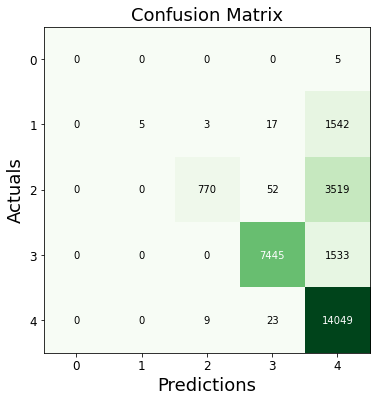

Training precision 0.7306
Training recall 0.4015


In [56]:
from mlxtend.plotting import plot_confusion_matrix

conf_matrix = confusion_matrix (y_train, train_pred)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

print ("Training precision", np.round (train_precn, 4))
print ("Training recall", np.round (train_recal, 4))



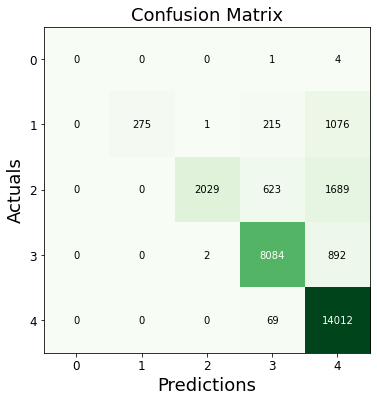

Cross-Val precision 0.7381
Cross-Val recall 0.5077


In [57]:
from mlxtend.plotting import plot_confusion_matrix

conf_matrix = confusion_matrix (y_train, cv_pred)

fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

print ("Cross-Val precision", np.round (cv_precn, 4))
print ("Cross-Val recall", np.round (cv_recal, 4))

## Cross Validation on the training Set

nobs= 999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 1999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 2999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 3999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 4999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 5999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 6999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 7999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 8999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 9999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 10999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 11999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 12999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 13999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 14999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 15999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 16999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 17999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 18999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 19999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 20999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 21999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 22999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 23999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 24999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 25999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 26999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 27999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


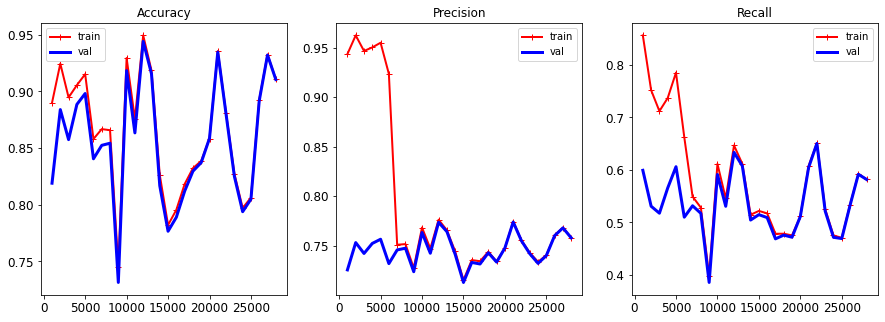

In [58]:
# Learning curve for RandomForest classifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

startobs = 999
increment = 1000

test_img = X_test

def plot_curve (pltid, x, y1, y2, ylab):
    pltid.plot(x, y1, "r-+", linewidth=2, label="train")
    pltid.plot(x, y2, "b-", linewidth=3, label="val")
    pltid.legend()
    pltid.set_title (ylab) 

def plot_learning_curves(model, X, y):
    #X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    #print ("Validation set labels:", y_val)
    train_accur, val_accur, train_precn, val_precn, train_recall, val_recall, n_obs = [], [], [], [], [], [], []
    for m in range(startobs, len(X_train), increment):
        print ("nobs=", m)
        model.fit (X[:m], y[:m])
        
        y_train_predict = model.predict (X[:m])
        y_val_predict = model.predict (X)
        
        train_accur.append (accuracy_score(y [:m], y_train_predict))
        train_precn.append (precision_score(y [:m], y_train_predict, average='macro'))
        train_recall.append (recall_score(y [:m], y_train_predict, average='macro'))
        
        val_accur.append (accuracy_score(y, y_val_predict))
        val_precn.append (precision_score(y, y_val_predict, average='macro'))
        val_recall.append (recall_score(y, y_val_predict, average='macro'))
        n_obs.append (m)

    fig, axs = plt.subplots(1,3, figsize=(15,5))
    plot_curve (axs[0], n_obs, train_accur, val_accur, "Accuracy")
    plot_curve (axs[1], n_obs, train_precn, val_precn, "Precision")
    plot_curve (axs[2], n_obs, train_recall, val_recall, "Recall")
    
plot_learning_curves(rf, X_train, y_train)

## Test Set Validation

In [59]:
test_pred = rf.predict (X_test)
test_precn = precision_score (y_test, test_pred, average='macro')
test_recal = recall_score (y_test, test_pred, average='macro')

/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


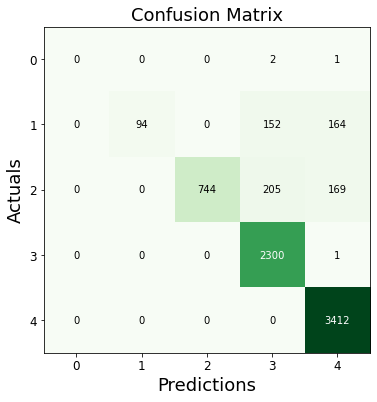

Test precision 0.7551
Test recall 0.5789


In [60]:
from mlxtend.plotting import plot_confusion_matrix

conf_matrix = confusion_matrix (y_test, test_pred)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

print ("Test precision", np.round (test_precn, 4))
print ("Test recall", np.round (test_recal, 4))

nobs= 999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 1999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 2999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 3999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 4999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 5999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 6999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 7999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 8999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 9999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 10999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 11999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 12999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 13999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 14999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 15999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 16999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 17999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 18999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 19999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 20999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 21999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 22999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 23999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 24999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 25999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 26999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 27999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


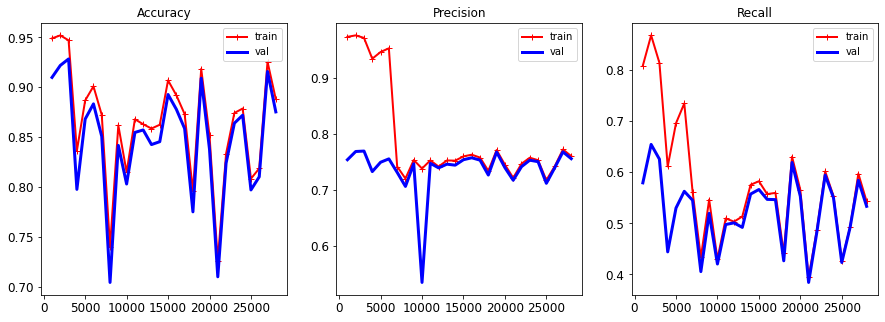

In [61]:
# Learning curve for RandomForest classifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

startobs = 999
increment = 1000

test_img = X_test

def plot_curve (pltid, x, y1, y2, ylab):
    pltid.plot(x, y1, "r-+", linewidth=2, label="train")
    pltid.plot(x, y2, "b-", linewidth=3, label="val")
    pltid.legend()
    pltid.set_title (ylab) 

def plot_learning_curves(model, X, y):
    #X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    #print ("Validation set labels:", y_val)
    train_accur, val_accur, train_precn, val_precn, train_recall, val_recall, n_obs = [], [], [], [], [], [], []
    for m in range(startobs, len(X_train), increment):
        print ("nobs=", m)
        model.fit (X[:m], y[:m])
        
        y_train_predict = model.predict (X[:m])
        y_val_predict = model.predict (test_img)
        
        train_accur.append (accuracy_score(y [:m], y_train_predict))
        train_precn.append (precision_score(y [:m], y_train_predict, average='macro'))
        train_recall.append (recall_score(y [:m], y_train_predict, average='macro'))
        
        val_accur.append (accuracy_score(y_test, y_val_predict))
        val_precn.append (precision_score(y_test, y_val_predict, average='macro'))
        val_recall.append (recall_score(y_test, y_val_predict, average='macro'))
        n_obs.append (m)

    fig, axs = plt.subplots(1,3, figsize=(15,5))
    plot_curve (axs[0], n_obs, train_accur, val_accur, "Accuracy")
    plot_curve (axs[1], n_obs, train_precn, val_precn, "Precision")
    plot_curve (axs[2], n_obs, train_recall, val_recall, "Recall")
    
plot_learning_curves(rf, X_train, y_train)

In [85]:
from sklearn.svm import SVC
svm_classifier = Pipeline(steps=[('preprocessor', preprocessor),
('classifier', SVC(kernel="poly", degree=3))])

In [86]:
svm_classifier.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['X_COORDINATE', 'Y_COORDINATE', 'Zip_Code', 'Stop_Month', 'Stop_Day',
       'Stop_Year', 'latitude', 'longitude', 'propertyTaxRate',
       'numPriceChanges', 'avgSchoolRating', 'MedianStudentsPerTeacher']...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Type', 'TCOLE_Sex', 'Standardized_Race_Known', 'Reason_for_Stop',
       'Street_Type', 'Search_Yes_or_No', 'TCOLE_Search_Based_On

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_predict


train_pred1 =svm_classifier.predict (X_train)
train_precn1 = precision_score (y_train, train_pred1, average='macro')
train_recal1 = recall_score (y_train, train_pred1, average='macro')

cv_pred1 = cross_val_predict (svm_classifier, X_train, y_train, cv=8)
cv_precn1 = precision_score (y_train, cv_pred1, average='macro')
cv_recal1 = recall_score (y_train, cv_pred1, average='macro')



/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


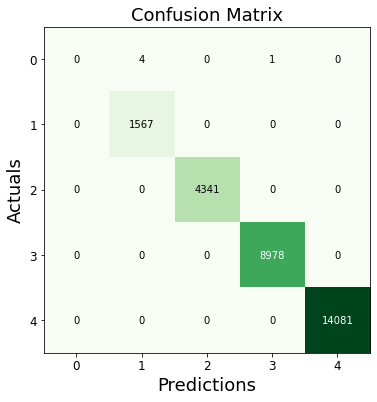

Training precision 0.7995
Training recall 0.8


In [88]:
from mlxtend.plotting import plot_confusion_matrix

conf_matrix1 = confusion_matrix (y_train, train_pred1)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix1, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

print ("Training precision", np.round (train_precn1, 4))
print ("Training recall", np.round (train_recal1, 4))


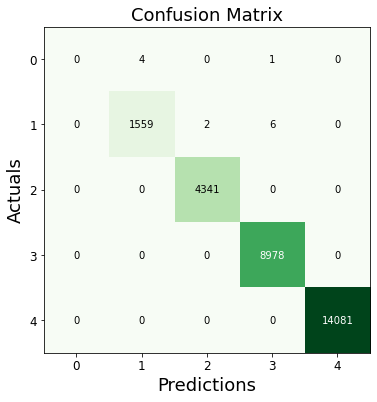

Cross-Val precision 0.7992
Cross-Val recall 0.799


In [89]:
from mlxtend.plotting import plot_confusion_matrix

conf_matrix1 = confusion_matrix (y_train, cv_pred1)

fig, ax = plot_confusion_matrix(conf_mat=conf_matrix1, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

print ("Cross-Val precision", np.round (cv_precn1, 4))
print ("Cross-Val recall", np.round (cv_recal1, 4))

## Cross Validation on Training Set

nobs= 999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 1999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 2999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 3999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 4999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 5999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 6999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 7999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 8999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 9999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 10999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 11999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 12999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 13999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 14999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 15999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 16999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 17999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 18999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 19999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 20999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 21999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 22999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 23999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 24999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 25999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 26999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 27999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


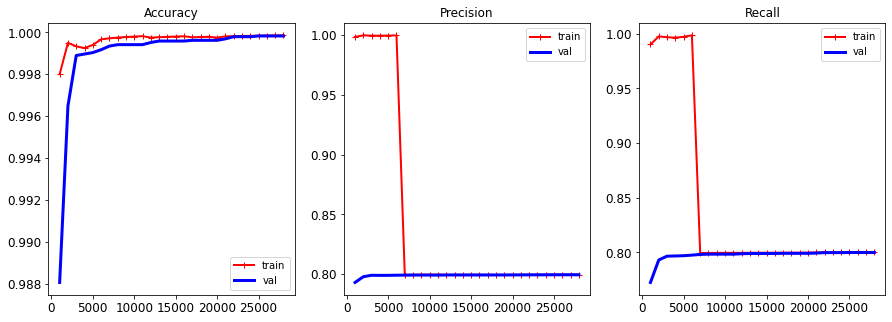

In [90]:
# Learning curve for SVM  classifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

startobs = 999
increment = 1000

test_img = X_test

def plot_curve (pltid, x, y1, y2, ylab):
    pltid.plot(x, y1, "r-+", linewidth=2, label="train")
    pltid.plot(x, y2, "b-", linewidth=3, label="val")
    pltid.legend()
    pltid.set_title (ylab) 

def plot_learning_curves(model, X, y):
    #X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    #print ("Validation set labels:", y_val)
    train_accur, val_accur, train_precn, val_precn, train_recall, val_recall, n_obs = [], [], [], [], [], [], []
    for m in range(startobs, len(X_train), increment):
        print ("nobs=", m)
        model.fit (X[:m], y[:m])
        
        y_train_predict = model.predict (X[:m])
        y_val_predict = model.predict (X)
        
        train_accur.append (accuracy_score(y [:m], y_train_predict))
        train_precn.append (precision_score(y [:m], y_train_predict, average='macro'))
        train_recall.append (recall_score(y [:m], y_train_predict, average='macro'))
        
        val_accur.append (accuracy_score(y, y_val_predict))
        val_precn.append (precision_score(y, y_val_predict, average='macro'))
        val_recall.append (recall_score(y, y_val_predict, average='macro'))
        n_obs.append (m)

    fig, axs = plt.subplots(1,3, figsize=(15,5))
    plot_curve (axs[0], n_obs, train_accur, val_accur, "Accuracy")
    plot_curve (axs[1], n_obs, train_precn, val_precn, "Precision")
    plot_curve (axs[2], n_obs, train_recall, val_recall, "Recall")
    
plot_learning_curves(svm_classifier, X_train, y_train)

## Test Set validation

In [91]:
test_pred1 = svm_classifier.predict (X_test)
test_precn1 = precision_score (y_test, test_pred1, average='macro')
test_recal1 = recall_score (y_test, test_pred1, average='macro')

/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


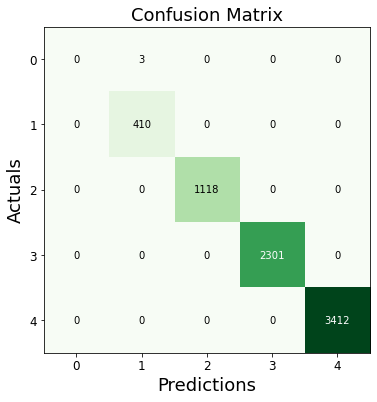

Test precision 0.7985
Test recall 0.7995


In [92]:
from mlxtend.plotting import plot_confusion_matrix

conf_matrix1 = confusion_matrix (y_test, test_pred)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix1, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

print ("Test precision", np.round (test_precn1, 4))
print ("Test recall", np.round (test_recal1, 4))

nobs= 999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 1999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 2999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 3999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 4999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 5999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 6999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 7999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 8999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 9999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 10999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 11999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 12999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 13999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 14999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 15999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 16999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 17999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 18999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 19999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 20999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 21999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 22999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 23999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 24999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 25999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 26999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


nobs= 27999


/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/share/anaconda3/envs/ds420/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


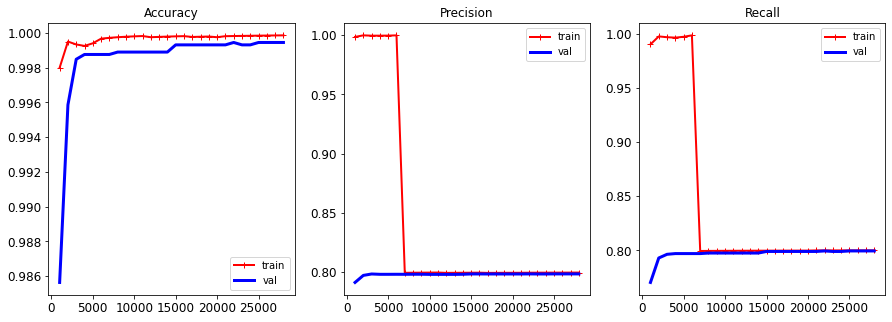

In [93]:
# Learning curve for SVM classifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

startobs = 999
increment = 1000

test_img1 = X_test

def plot_curve (pltid, x, y1, y2, ylab):
    pltid.plot(x, y1, "r-+", linewidth=2, label="train")
    pltid.plot(x, y2, "b-", linewidth=3, label="val")
    pltid.legend()
    pltid.set_title (ylab) 

def plot_learning_curves(model, X, y):
    #X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    #print ("Validation set labels:", y_val)
    train_accur, val_accur, train_precn, val_precn, train_recall, val_recall, n_obs = [], [], [], [], [], [], []
    for m in range(startobs, len(X_train), increment):
        print ("nobs=", m)
        model.fit (X[:m], y[:m])
        
        y_train_predict = model.predict (X[:m])
        y_val_predict = model.predict (test_img)
        
        train_accur.append (accuracy_score(y [:m], y_train_predict))
        train_precn.append (precision_score(y [:m], y_train_predict, average='macro'))
        train_recall.append (recall_score(y [:m], y_train_predict, average='macro'))
        
        val_accur.append (accuracy_score(y_test, y_val_predict))
        val_precn.append (precision_score(y_test, y_val_predict, average='macro'))
        val_recall.append (recall_score(y_test, y_val_predict, average='macro'))
        n_obs.append (m)

    fig, axs = plt.subplots(1,3, figsize=(15,5))
    plot_curve (axs[0], n_obs, train_accur, val_accur, "Accuracy")
    plot_curve (axs[1], n_obs, train_precn, val_precn, "Precision")
    plot_curve (axs[2], n_obs, train_recall, val_recall, "Recall")
    
plot_learning_curves(svm_classifier, X_train, y_train)

## Model selection

A pipeline can also be used during the model selection process. The following example
code loops through a number of scikit-learn classifiers applying the transformations and
training the model.

from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


classifiers = [
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    
]

classifiers1 = [
    
    OneVsOneClassifier(SGDClassifier (max_iter=5, tol=-np.infty, random_state = 42)),
    SGDClassifier (max_iter=5, tol=-np.infty, random_state = 42),
    SVC(kernel="poly", degree=1),
    
]

for classifier in classifiers: 
    pipe = Pipeline(steps=[('preprocessor', preprocessor),('classifier', classifier)])
    pipe.fit(X_train, y_train)
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test, y_test))

for classifier in classifiers1: 
    pipe = Pipeline(steps=[('preprocessor', preprocessor),('classifier', classifier)])
    pipe.fit(X_train, y_train)
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test, y_test))